In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features=10, n_samples=1000, random_state=78)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=78)
m_samples, n_features = X_train.shape
m_samples, n_features

(850, 10)

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
W = np.zeros(n_features)
b = 0
W.shape

(10,)

In [4]:
def predict_proba(X, W, b):
    return W.dot(X.T) + b

def predict(X, W, b, thresh=0.5):
    pred = lambda x: x >= thresh
    return pred(W.dot(X.T) + b).astype(int)

predict(X_train, W, b)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
def cost_f(X, y_true, y_pred):
    return np.mean(-y_true * np.log(sigmoid(y_pred)) - (1 - y_true) * np.log(1 - sigmoid(y_pred)))

cost_f(X_train, y_train, predict_proba(X_train, W, b)).shape # all value will be equal because 0.5 == 1 - 0.5

()

I'll implement gradient descent (not stochastic ). I will count gradients on whole dataset and then I'll take mean of them

Formula proof here https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

In [6]:
def dw_df(X, y_true, y_pred):
    return (1 / m_samples) * X.T.dot(y_pred - y_true)

def db_df(X, y_true, y_pred):
    return np.mean((y_pred - y_true))

display(dw_df(X_train, y_train, predict_proba(X_train, W, b)))
display(db_df(X_train, y_train, predict_proba(X_train, W, b)))

array([-0.29370731,  0.02842436, -0.00832134, -0.01182064, -0.01660404,
        0.08544391, -0.03758927, -0.0248445 , -0.50800425, -0.02156929])

-0.4976470588235294

In [7]:
def update_W_b(W, b, dw_df, db_df, lr=0.01):
    return (W - lr * dw_df, b - lr * db_df)

In [8]:
# Finally! Loop for logistic regression
# cost_f I will use only for plot
iterations = list(range(150))
losses = []
for i in iterations:
    y_pred = predict_proba(X_train, W, b)
    losses.append(cost_f(X_train, y_train, y_pred))
    dw = dw_df(X_train, y_train, y_pred)
    db = db_df(X_train, y_train, y_pred)
    W, b = update_W_b(W, b, dw, db)

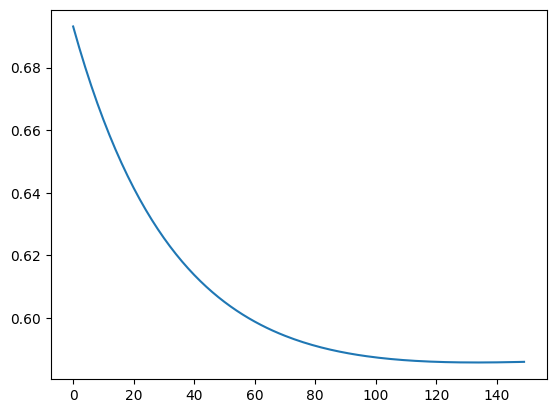

In [9]:
import matplotlib.pyplot as plt
plt.plot(iterations, losses)
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print(f"Accuracy: {accuracy_score(y_test, predict(X_test, W, b))}")
print(f"F1: {f1_score(y_test, predict(X_test, W, b))}")
print(f"roc_auc: {roc_auc_score(y_test, predict_proba(X_test, W, b))}")

Accuracy: 0.8333333333333334
F1: 0.8031496062992126
roc_auc: 0.9608819345661451


In [11]:
# Let's compare to sklearn model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=78).fit(X_train, y_train)
print(f"Accuracy: {accuracy_score(y_test, clf.predict(X_test))}")
print(f"F1: {f1_score(y_test, clf.predict(X_test))}")
print(f"roc_auc: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}")

Accuracy: 0.92
F1: 0.9166666666666667
roc_auc: 0.9607041251778095


In [12]:
W

array([ 0.11869373, -0.01257864,  0.00253644,  0.02138695,  0.00607082,
       -0.03536121,  0.01238214, -0.00751925,  0.2138664 ,  0.01291045])